## Análisis Experimento 2: modelo control vs extendido

In [1]:
import numpy as np
import seaborn, math, os
from matplotlib import pyplot as plt
import scipy.stats as stats

C:\Anaconda\envs\py35\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [ ]:
%matplotlib notebook
plt.style.use('seaborn-notebook')
np.set_printoptions(precision=3, suppress=True)

In [ ]:
%run medidas_biodiversidad.py

In [ ]:
def calcular_riqueza(datos, paisajes, bio_min = 5.):
    riquezas = np.zeros((40, 10))
    for comunidad in range(len(datos)):
        for intensificacion in range(len(datos[0])):
            riquezas[comunidad, intensificacion] = riqueza_agricola(
                                                    datos[comunidad][intensificacion], 
                                                    paisajes[intensificacion],
                                                    t=-2, biomasa_min = bio_min)[1]
    return riquezas

In [2]:
def calcular_biomasa(datos, paisajes, bio_min = 5.):
    biomasas = np.zeros((40, 10))
    for comunidad in range(len(datos)):
        for intensificacion in range(len(datos[0])):
            biomasas[comunidad, intensificacion] = riqueza_agricola(
                                                    datos[comunidad][intensificacion], 
                                                    paisajes[intensificacion],
                                                    t=-2, biomasa_min = bio_min)[0]
            
    return biomasas

In [3]:
def calcular_promedio(riquezas):
    """Recibe datos de riqueza.
    """
    promedios = np.zeros(10)
    std = np.zeros(10)
    for i in range(10):
        promedios[i] = np.mean(riquezas[riquezas[:, 0]>=0, i]) #Por qué >=???
        std[i] = np.std(riquezas[:, i])
    return promedios, std

In [4]:
paisajes = [None] * 5
for het in range(5):
    paisajes[het] = np.load("paisajes_h{}.npy".format(het))

In [5]:
datos = [None] * 2

files = os.listdir("./datos/exp2")
files.sort()
datos[0] = [np.load("./datos/exp2/" + file) for file in files]

files = os.listdir("./datos/exp1")
files.sort()
files = list(filter(lambda x: x[6] == "2", files))
datos[1] = [np.load("./datos/exp1/" + file) for file in files]
comunidad = [file[9:12] for file in files]

NameError: name 'os' is not defined

In [9]:
riquezas = [None] * 2
biomasas = [None] * 2

riquezas_mean = [None] * 2
riquezas_sd = [None] * 2

biomasas_mean = [None] * 2
biomasas_sd = [None] * 2

for k in range(2):
    riquezas[k] = calcular_riqueza(datos[k], paisajes[2], bio_min = 5)
    riquezas_mean[k], riquezas_sd[k] = calcular_promedio(riquezas[k])
    biomasas[k] = calcular_biomasa(datos[k], paisajes[2], bio_min = 5)
    
    #normalizar biomasas:
    
    for i in range(len(biomasas[k])):
        biomasas[k][i] = biomasas[k][i] / biomasas[k][i, 0]    
    
    biomasas_mean[k], biomasas_sd[k] = calcular_promedio(biomasas[k])

C:\Anaconda\envs\py34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<IPython.core.display.Javascript object>


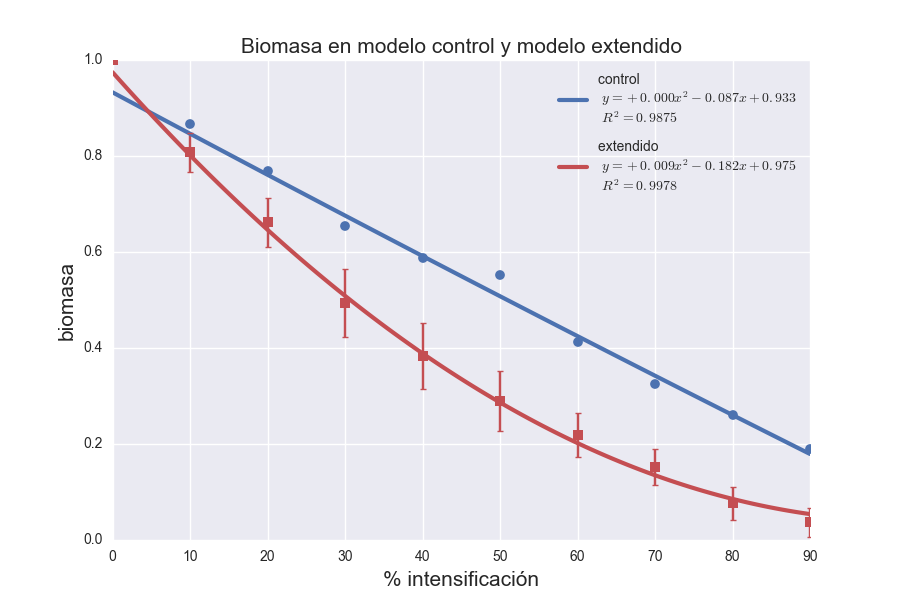

In [10]:
# Graficar
%matplotlib notebook
plt.style.use('seaborn-notebook')
seaborn.set_palette("deep", color_codes=True)

promedios = biomasas_mean
sd = biomasas_sd

y = [None] * 2
res = [None] * 2
p = [None] * 2
r2 = [None] * 2

x = np.linspace(0, 9, 100)
xdata = np.array(range(10))
xlabels = np.array(range(10)) * 10 

ylabels=["control", "extendido"]
puntos= ["o", "s"]
colors = ['b', 'r']

for k in range(2):
    res[k] = np.polyfit(xdata, promedios[k], 2, w=sd[k])
    p[k] = np.poly1d(res[k])
    r2[k] = 1 - ((np.sum((p[k](range(10)) - promedios[k])**2)) / (np.sum((promedios[k] - np.mean(promedios[k]))**2)))
        
fig = plt.figure(figsize=(9, 6), dpi = 100)

for k in range(2):
    y[k] = p[k](x)
    plt.plot(x, y[k], lw = 3, color = colors[k], label='{} \n $y = {:+.3f} x^2 {:+.3f} x {:+.3f}$ \n $R^2={:.4f}$ '.format(
                            ylabels[k], float(p[k][2]), float(p[k][1]), float(p[k][0]), float(r2[k]))) #fit
    plt.errorbar(xdata, promedios[k], capsize = 2, yerr=sd[k], fmt=puntos[k], color = colors[k], capthick=1)

#plt.ylim(-0.05, 10)
#plt.xlim(-0.05, 9.1)
plt.xticks(xdata, xlabels)
plt.xlabel("% intensificación", size = 15)
plt.ylabel("biomasa", size = 15)
plt.title("Biomasa en modelo control y modelo extendido", size = 15)
plt.legend(loc='best', fontsize = "small", labelspacing=1)
plt.show()

### Anova

In [11]:
# shape: [experimento, comunidades, intensificación]
riquezas = np.array(riquezas)
biomasas = np.array(biomasas)

¿Hay una diferencia significativa entre los niveles de intensificación?

In [12]:
exp = 0
ttest2 = stats.f_oneway( riquezas[exp, :, 0],
                         riquezas[exp, :, 1],
                         riquezas[exp, :, 2],
                         riquezas[exp, :, 3],
                         riquezas[exp, :, 4],
                         riquezas[exp, :, 5],
                         riquezas[exp, :, 6],
                         riquezas[exp, :, 7],
                         riquezas[exp, :, 8],
                         riquezas[exp, :, 9])
ttest2

F_onewayResult(statistic=14.9082805267693, pvalue=7.5536360325903948e-21)

¿En qué niveles de intensificación hay una diferencia significativa entre el modelo control y el extendido?

In [13]:
for n in range(10):
    ttest = stats.ttest_ind(riquezas[0, :, n],
                            riquezas[1, :, n], equal_var=False)
    print("nivel {}:  ".format(n), ttest[0], ttest[1])

nivel 0:   -0.889461364886 0.376514197086
nivel 1:   -1.08621494952 0.280765470128
nivel 2:   -1.08302000481 0.282146738002
nivel 3:   -1.20891897156 0.230348156632
nivel 4:   -1.83504792337 0.0703229777141
nivel 5:   -2.0019401414 0.0488062933961
nivel 6:   -2.30152182801 0.0240529899782
nivel 7:   -2.50211520017 0.0144390725147
nivel 8:   -2.05481661499 0.0432556552305
nivel 9:   0.302329941693 0.763205371356
